In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical_csv')

('medical_csv', <http.client.HTTPMessage at 0x19895c7d940>)

In [3]:
import pandas as pd
df = pd.read_csv('medical_csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9348\641129197.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(df , x = 'bmi' , marginal= 'box' ,color_discrete_sequence=['red'], title = "Distribution of BMI")
fig.update_layout(bargap = 0.1)
fig.show()

In [11]:
fig = px.histogram(df, x ='charges' , marginal = 'box' , color_discrete_sequence=['orange','yellow'], color = 'smoker', title = "Distribution of charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [12]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [13]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [14]:
px.histogram(df , x='smoker', title = 'Smoker' ,color = 'sex', color_discrete_sequence=['pink','brown'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
fig = px.histogram(df, x= 'charges', color = 'children' ,title = "children distribution")
fig.update_layout(bargap = 0.1)

In [18]:
px.histogram(df, x='children', title = 'children Distribution')

In [19]:
px.histogram(df, x='region', title = 'Region Distribution' , marginal = 'box')


In [20]:
fig = px.scatter(df, x='age' , y='charges',color = 'smoker', opacity = 0.8 , hover_data= ['sex'] , title = 'Age vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [21]:
fig = px.scatter(df, x = 'bmi' , y='charges', color = 'smoker' , title = "BMI vs Charges", hover_data= ['sex', 'children'], opacity = 0.8)
fig.update_traces(marker_size = 5)
fig.show()

In [22]:
px.violin(df, x='children' , y='charges')

In [23]:
print(df.charges.corr(df.age))
print(df.charges.corr(df.children))
print(df.charges.corr(df.charges))
print(df.charges.corr(df.bmi))

0.2990081933306478
0.06799822684790487
1.0
0.19834096883362887


In [24]:
smoker_values = {'yes' : 1 ,'no' : 0}
smoker_num = df.smoker.map(smoker_values)
smoker_num

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [25]:
print(df.charges.corr(smoker_num))

0.7872514304984778


<Axes: xlabel='age', ylabel='charges'>

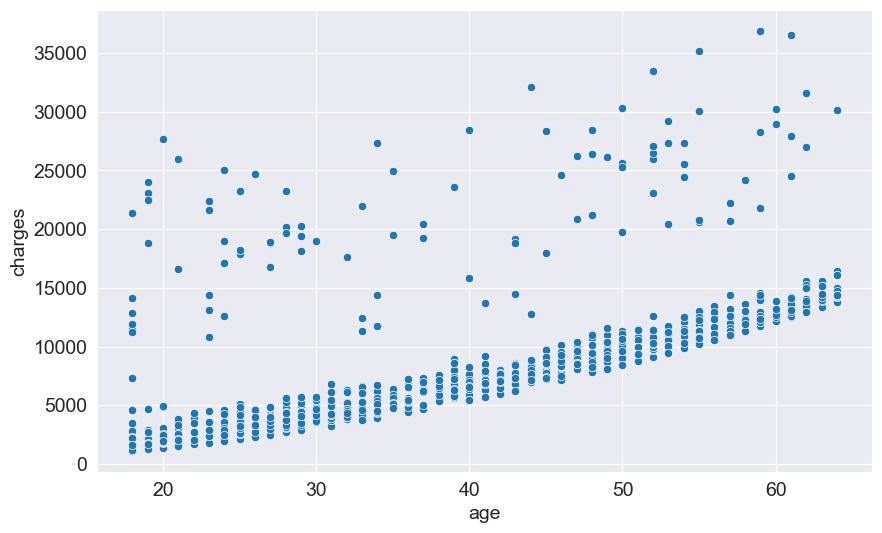

In [26]:
non_smoker = df[df.smoker == 'no']
sns.scatterplot(non_smoker, x='age' , y = "charges" )

In [27]:
non_smoker

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [28]:
target = non_smoker.charges

In [29]:
prediction = non_smoker.age * 10 + 500
prediction

1        680
2        780
3        830
4        820
5        810
        ... 
1332    1020
1333    1000
1334     680
1335     680
1336     710
Name: age, Length: 1064, dtype: int64

<Axes: xlabel='age', ylabel='charges'>

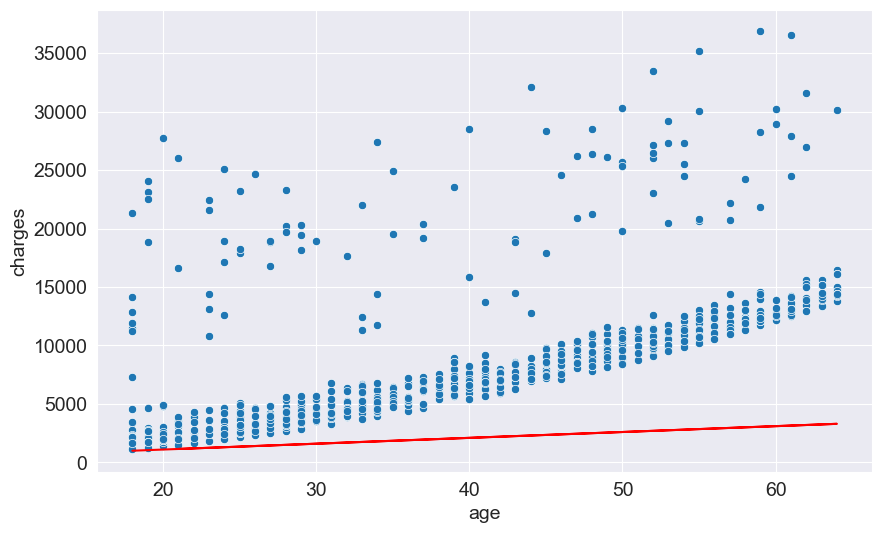

In [30]:
def estimate_charges(age,w,b):
    return w*age+b
ages = non_smoker.age
estimation = estimate_charges(ages,50,100)
plt.plot(ages, estimation , 'r')
sns.scatterplot(non_smoker, x=ages , y = non_smoker.charges)

In [31]:
import numpy as np
def rmse(target,estimation):
    rmse_score = np.sqrt(np.mean(np.square(target-estimation)))
    return rmse_score
rmse(non_smoker.charges, estimation)

8461.949562575493

RMSE LOSS :  5162.468485137786


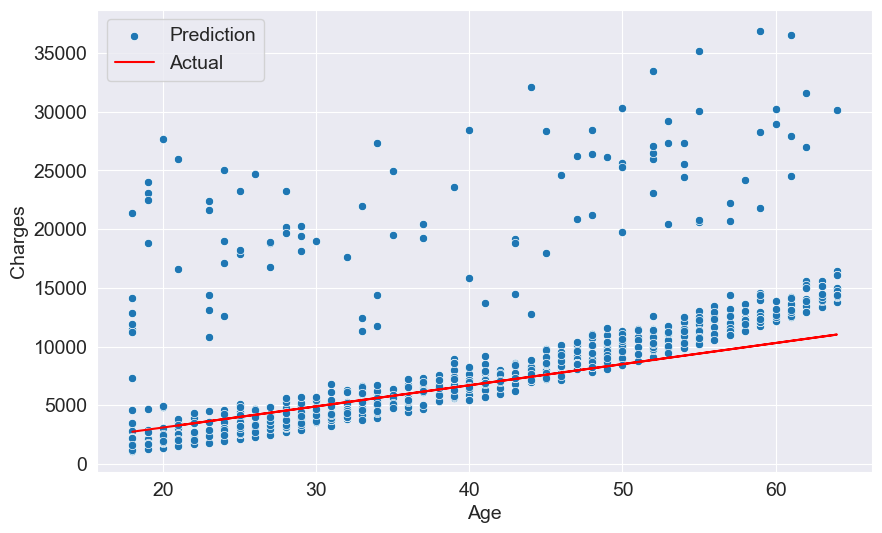

In [32]:
def try_params(w,b):
    target = non_smoker.charges
    ages = non_smoker.age 
    estimation = estimate_charges(ages,w,b)
    sns.scatterplot(non_smoker, x= ages , y='charges')
    plt.plot(ages,estimation,'r')
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction' , 'Actual'])
    loss = rmse(target,estimation)
    print("RMSE LOSS : ", loss)
try_params(180,-500)

In [52]:
from sklearn.linear_model import LinearRegression
inputs = non_smoker[['age']]
target = non_smoker.charges
print(inputs.shape)
print(target.shape)
model = LinearRegression()
model.fit(inputs , target)
predictions = model.predict(inputs)
print(target)

(1064, 1)
(1064,)
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


In [53]:
rmse(target,predictions)

4662.505766636395

<Axes: xlabel='age', ylabel='charges'>

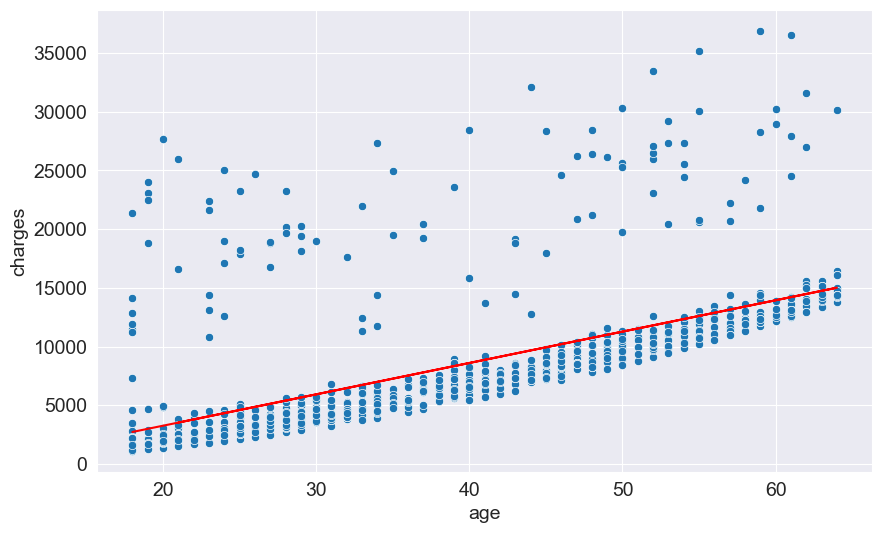

In [57]:
plt.plot(inputs,predictions,'r')
sns.scatterplot(non_smoker, x='age', y='charges')

In [60]:
print(model.coef_)
print(model.intercept_)

[267.24891283]
-2091.4205565650864
